# Support Vector Machine

In [55]:
# file path exist
import os.path
from os import path

# translator
import googletrans
from googletrans import Translator

# pandas
import pandas as pd

# preprocessing of text
import re
import string


# word tokenizer by nltk
from nltk import word_tokenize

# lemmatizer
from nltk.stem import WordNetLemmatizer

# stopwords (Remove buzz words)
from nltk.corpus import stopwords

# split data into train and test
from sklearn.model_selection import train_test_split

# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

# RFM classifier from scikit learn
from sklearn.svm import LinearSVC

# Tf-idf feature extraction 
from sklearn.feature_extraction.text import TfidfVectorizer

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# cross validation for kfold
from sklearn.model_selection import cross_val_score

# calc accuracy
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [56]:
# For non English data
filename  = 'Eng-Hin-data/english-anot-shuffled'

df = pd.read_csv(filename + '.csv',  
               delimiter=',')
df.columns = ['Text', 'Label']
df.head(15)
df["Text"] = df["Text"].astype(str)
df["Label"] = df["Label"].astype(str)
data = df

### Class count

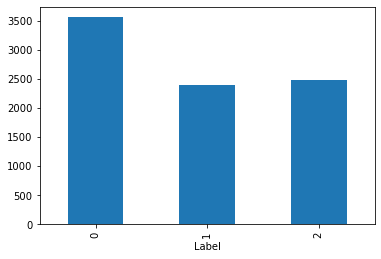

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
df.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [58]:
# For entire dataset sentences for each labels 
df.Label.value_counts()

0    3555
2    2485
1    2398
Name: Label, dtype: int64

### Data Preprocessing

In [59]:
# People usually join sentences using more than one colon 

def ReplaceDoubleColon(inputString):
    return inputString.replace("..", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceDoubleColon(x))

def ReplaceTripleColon(inputString):
    return inputString.replace("...", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceTripleColon(x))

def ReplaceFourColon(inputString):
    return inputString.replace("....", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceFourColon(x))

In [60]:
#Removing punctuations
data['Text'] = data['Text'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [61]:
def textPattern(text):

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r" \n ", " ", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"hadn't", "had not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"mustn't", "must not", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\'re", "are", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\= =", " ", text)
    text = re.sub(r"\==", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

data['Text'] = data['Text'].apply(lambda x: textPattern(x))

In [62]:
data.shape

(8438, 2)

In [63]:
# Word Tokenization
tokens = [word_tokenize(sen) for sen in data.Text]

In [64]:
# Lower Case
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [65]:
# Remove Link

def removeLink(token):
    word = []
    for w in token:
        if not w.startswith('http'):
            word.append(w)
    return word 
    
removedLink_tokens = [removeLink(token) for token in lower_tokens]

In [66]:
# Word Lemmatization
def lemmatization(token):
    return [lemmatizer.lemmatize(w) for w in token] 

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatization(token) for token in removedLink_tokens]

In [67]:
# Removing Stopwords
stoplist = stopwords.words('english')

In [68]:
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in lemmatized_tokens]
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

In [69]:
zero  = []
one = []
two = []
for l in data.Label:
    
    if l == '0':
        zero.append(1)
        one.append(0)
        two.append(0)
    elif l == '1':
        zero.append(0)
        one.append(1)
        two.append(0)
    elif l == '2':
        zero.append(0)
        one.append(0)
        two.append(1)
        
data['0']= zero
data['1']= one
data['2']= two

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2']]

In [70]:
category_id = []
for l in data.Label:
    
    if l == '0':
        category_id.append('0')
    elif l == '1':
        category_id.append('1')
    elif l == '2':
        category_id.append('2')
        
data['Category_id'] = category_id

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2', 'Category_id' ]]
data.tail(9)

,Text_Final,tokens,Label,0,1,2,Category_id
8429,happy new year 1 muharram 1442h,"[happy, new, year, 1, muharram, 1442h]",1,0,1,0,1
8430,alqadipal radical islamic shit made lebanon ba...,"[alqadipal, radical, islamic, shit, made, leba...",2,0,0,1,2
8431,bbcnews root call final push seal series win p...,"[bbcnews, root, call, final, push, seal, serie...",0,1,0,0,0
8432,ashusz309 isbunited abid place imam bcz perfor...,"[ashusz309, isbunited, abid, place, imam, bcz,...",0,1,0,0,0
8433,xmufcalisha looking like cricket scoreline,"[xmufcalisha, looking, like, cricket, scoreline]",0,1,0,0,0
8434,qanon terrorist organisation trump better call...,"[qanon, terrorist, organisation, trump, better...",2,0,0,1,2
8435,franchise cricket tournament ha better fieldin...,"[franchise, cricket, tournament, ha, better, f...",0,1,0,0,0
8436,every muslim apj abdul kalam sir otherwise ter...,"[every, muslim, apj, abdul, kalam, sir, otherw...",2,0,0,1,2
8437,happy first muharram may allah bring joy amp h...,"[happy, first, muharram, may, allah, bring, jo...",1,0,1,0,1


In [71]:
from io import StringIO
category_id_df = data[['Label', 'Category_id']].drop_duplicates().sort_values('Category_id')
category_to_label_dict = dict(category_id_df.values)
label_to_category_dict = dict(category_id_df[['Category_id', 'Label']].values)

#### Split Data into test and train
We will use 90 % data for training and 10 % for testing. We use random state so every time we get the same training and testing data.

# Support Vector Method (SVM) and Random Forest Method (RFM)

We referred a blog on Multi class classification for SVM and RFM [2]

### Generating features using TF-IDF Vectorizer method

In [72]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 5), stop_words='english')
features = vectorizer.fit_transform(data.Text_Final).toarray()
labels = data.Label
features.shape

(8438, 15330)

### Testing SVM models using K-fold cross validation


In [73]:
import random

# Creating model 
model = LinearSVC()

# KFold cross-validation
kFold = 10

scores = []
#To get accuracy of the model for 10 different splits
scoreValue = cross_val_score(model, features, labels, scoring='accuracy', cv= kFold)

# append name and score of each model with different splits
print("Support Vector with Tf-idf: ")
for fold_idx, accuracy in enumerate(scoreValue):
    print ((fold_idx + 1), accuracy)
    scores.append(accuracy)
    
Mean_score =  sum(scores) / len(scores)
print(f" Average Accuracy : {Mean_score}" )


Support Vector with Tf-idf: 
1 0.9609004739336493
2 0.9632701421800948
3 0.9537914691943128
4 0.943127962085308
5 0.9585308056872038
6 0.9454976303317536
7 0.966824644549763
8 0.9632701421800948
9 0.9525504151838672
10 0.9584816132858838
 Average Accuracy : 0.9566245298611931


In [74]:
### Spliting data 80/ 20

In [75]:
# Using similar split as CNN model
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(features, labels, data.index, test_size=0.10, random_state=42)

### SVM - Generating model 

In [76]:
# generate Linear SVM model
model = LinearSVC()
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### SVM - Showing some prediction

In [77]:
# 0
print(clf.predict(vectorizer.transform(["Modi ho ya Manmohan singh saala yeh log kuch ny karta hai sirf vote ka lia 56 ka seena dikahata hai"])))

['0']


In [78]:
# 2
print(clf.predict(vectorizer.transform(["Muslim asshole !"])))

['2']


In [79]:
# 1
print(clf.predict(vectorizer.transform(["Islam is beautiful"])))

['1']


In [80]:
print(clf.predict(vectorizer.transform(["Blacks are asshole"])))

['0']


###  SVM - Displaying false-positive rate (FPR) and true positive rate (TPR)

                          Support Vector Method


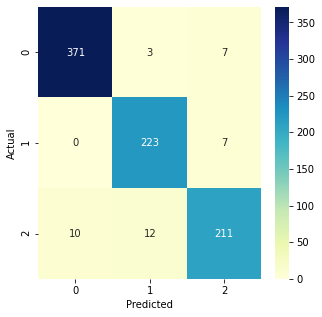

In [81]:
from sklearn.metrics import confusion_matrix
print("                          Support Vector Method")
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap ='YlGnBu',
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### SVM - Precision, Recall and F1-Score to quantify the quality of our model using a confusion matrix

In [82]:
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[371   3   7]
 [  0 223   7]
 [ 10  12 211]]
Accuracy Score : 0.9537914691943128
Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       381
           1       0.94      0.97      0.95       230
           2       0.94      0.91      0.92       233

    accuracy                           0.95       844
   macro avg       0.95      0.95      0.95       844
weighted avg       0.95      0.95      0.95       844



# SVM - BOW

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
features1 = count_vect.fit_transform(data.Text_Final).toarray()
labels = data.Label
features1.shape

(8438, 16552)

In [84]:
# Using similar split 80/20
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(features1, labels, data.index, test_size=0.10, random_state=12)

In [85]:
# generate Linear SVM model
model2 = LinearSVC()
clf2 = model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

### SVM - BOW - Showing some prediction

In [86]:
# 0
print(clf2.predict(count_vect.transform(["Modi ho ya Manmohan singh saala yeh log kuch ny karta hai sirf vote ka lia 56 ka seena dikahata hai"])))

['0']


In [87]:
# 0
print(clf2.predict(count_vect.transform(["i am micro investor, need advise on adding stocks on monthly basis !"])))

['0']


In [88]:
# 0
print(clf2.predict(count_vect.transform(["These media fellows have time to dissect one's social media profile,but none of spineless jokers has the guts to question as to why and how a convict like Lalu Yadav is roaming outside and running a Government."])))

['0']


In [89]:
# 2
print(clf2.predict(count_vect.transform(["Muslim asshole !"])))

['2']


In [90]:
# 1
print(clf2.predict(count_vect.transform(["Islam is beautiful religion with good people"])))

['2']


In [91]:
# 1
print(clf2.predict(count_vect.transform(["@dillyaali @OlaitanHabibat @MubarakDalhat11 @FakhuusHashim you are not Muslim so don't insult Quran verses I warned you"])))

['1']


In [92]:
# 0
print(clf2.predict(count_vect.transform(["Blacks are asshole"])))

['0']


###  SVM - BOW - Displaying false-positive rate (FPR) and true positive rate (TPR)

                     Support Vector Method - BOW


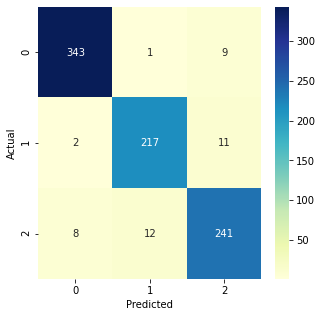

In [93]:
from sklearn.metrics import confusion_matrix
print("                     Support Vector Method - BOW")
conf_mat = confusion_matrix(y_test, y_pred2)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### SVM - BOW - Precision, Recall and F1-Score to quantify the quality of our model using a confusion matrix.

In [94]:
results2 = confusion_matrix(y_test, y_pred2)
print ('Confusion Matrix :')
print(results2) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred2))
print ('Report : ')
print (classification_report(y_test, y_pred2))

Confusion Matrix :
[[343   1   9]
 [  2 217  11]
 [  8  12 241]]
Accuracy Score : 0.9490521327014217
Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       353
           1       0.94      0.94      0.94       230
           2       0.92      0.92      0.92       261

    accuracy                           0.95       844
   macro avg       0.95      0.95      0.95       844
weighted avg       0.95      0.95      0.95       844



### SVM with BOW kfold

In [95]:
# KFold cross-validation
kFold = 10

scores = []
#To get accuracy of the model for 10 different splits
scoreValue = cross_val_score(model2, features1, labels, scoring='accuracy', cv= kFold)

# append name and score of each model with different splits
print("Random Forest with BOW: ")
for fold_idx, accuracy in enumerate(scoreValue):
    print ((fold_idx + 1), accuracy)
    scores.append(accuracy)
    
Mean_score =  sum(scores) / len(scores)
print(f" Average Accuracy : {Mean_score}" )

Random Forest with BOW: 
1 0.9478672985781991
2 0.9656398104265402
3 0.9502369668246445
4 0.9443127962085308
5 0.9585308056872038
6 0.9419431279620853
7 0.966824644549763
8 0.9597156398104265
9 0.9549228944246738
10 0.9466192170818505
 Average Accuracy : 0.953661320155392


### Reference

[2] Multi-Class Text Classification with Scikit-Learn by Susan Li

[3] Scikit-Learn Documentation https://scikit-learn.org/